In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

from tqdm import tqdm

In [32]:
l = 0.1

ms = np.arange(2, 9)
pi_est = np.zeros_like(ms, dtype=float)
pi_est_err = np.zeros_like(ms, dtype=float)

measure_num = 100
Nb = 10000000

for i, m in enumerate(ms):
    
    m_data = np.zeros(measure_num)
    
    for j in tqdm(range(measure_num)):
        
        n = 10 ** m
        poss = np.random.rand(n) * 0.5
        
        # sample uniform theta using gaussian
        
        xs = np.random.normal(0, 1, n)
        ys = np.random.normal(0, 1, n)

        # calculate cos values
        
        coss = np.abs(xs) / np.sqrt(xs ** 2 + ys ** 2)
        
        #calculate the left point of bars
        
        left = poss - coss * 0.5 * l
        
        count = np.sum((left < 0))
        rat = count / len(left)
        
        m_data[j] = 2.0 * l / rat

    
    # use bootstrap resampling

    x_bar = np.mean(m_data)
    rB = np.random.choice(m_data, (measure_num, Nb))
    xB = np.mean(rB, axis = 0)
    xB_bar = np.mean(xB)

    pi_est[i] = 2*x_bar - xB_bar
    pi_est_err[i] = np.std(xB) * np.sqrt(measure_num / (measure_num - 1))

100%|█████████████████████████████████████████| 100/100 [07:06<00:00,  4.27s/it]


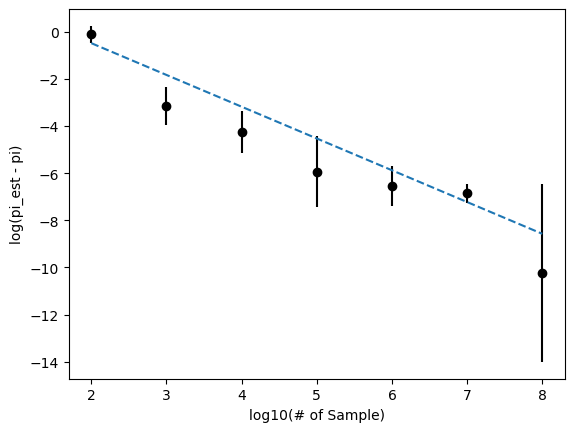

chi^2 / DOF : 1.3861068758438744


In [69]:
func = lambda x, a0, a1 : a0 + a1 * x

pis_true = np.full(len(ms), np.pi)

plot_ys = np.log(np.abs(pi_est - pis_true))
plot_yerrs = pi_est_err / np.abs(pi_est-np.pi)

popt, pcov = curve_fit(func, ms, plot_ys, sigma = plot_yerrs, absolute_sigma = True)
a0opt, a1opt = popt
perr = np.sqrt(np.diag(pcov))


plt.errorbar(ms, plot_ys, yerr = plot_yerrs, fmt = 'ko')
plt.plot(ms, func(ms, a0opt, a1opt), linestyle='--')
plt.xlabel('log10(# of Sample)')
plt.ylabel('log(pi_est - pi)')

plt.savefig("3")
plt.show()

print(f"chi^2 / DOF : {np.sum((plot_ys - func(ms, a0opt, a1opt))**2) / (len(ms) - 1)}")

In [62]:
for i, pi in enumerate(pi_est):
    print(f"{pi_est[i]} +/- {pi_est_err[i]}")

4.032477002081531 +/- 0.3228029167905084
3.1840243551287055 +/- 0.03437220346028788
3.1559110638655614 +/- 0.012817043559556424
3.1442492990359305 +/- 0.004033501846319723
3.1401608822702447 +/- 0.0012256167129386436
3.1405453327946264 +/- 0.00042865137432105863
3.141628770330914 +/- 0.0001365452627180557


In [74]:
for i, a in enumerate(popt):
    print(f"{popt[i]} +/- {perr[i]}")

2.2105267574819676 +/- 0.5023026104943197
-1.3479955024788868 +/- 0.10450076438166823
